##### Finding errors in data empty values and other datatypes

In [15]:
import pandas as pd


df = pd.read_csv(r'C:\ML_Scikit\Unsupervised_learning\student_performance017 - Sheet1.csv')

print("sample rows")
print(df.head())

print("data set shape")
print(f'Rows : {df.shape[0]},Columns : {df.shape[1]}')

print("dataset info ")
print(df.info())

print("summary statistics")
print(df.describe(include='all'))

print('missing value')
print(df.isnull().sum())



sample rows
   StudyHours  Attendence  PastScore Internet  Sleephours Passed
0           2          60         40     yes            5    no 
1           5          80         60       no           6    yes
2           8          90         75     yes            8    yes
3           3          70         50     yes            5    no 
4           7          85         70       no           7    yes
data set shape
Rows : 20,Columns : 6
dataset info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendence  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   Sleephours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
summary statistics
        StudyHours  Attendence  PastScore Internet 

##### Dataset cleaning process Removing empty values and cleaning data for processing

In [16]:
import pandas as pd


from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'C:\ML_Scikit\Unsupervised_learning\student_performance017 - Sheet1.csv')

print("Missing Values in each column")
print(df.isnull().sum())

le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed']  = le.fit_transform(df['Passed'])

print('After encoding')
print(df.head())

print('Data-types after cleaning')
print(df.dtypes)


Missing Values in each column
StudyHours    0
Attendence    0
PastScore     0
Internet      0
Sleephours    0
Passed        0
dtype: int64
After encoding
   StudyHours  Attendence  PastScore  Internet  Sleephours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
Data-types after cleaning
StudyHours    int64
Attendence    int64
PastScore     int64
Internet      int64
Sleephours    int64
Passed        int64
dtype: object


##### Feature Scaling making large values similar Standard Scalar method or MinMax Scalar

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



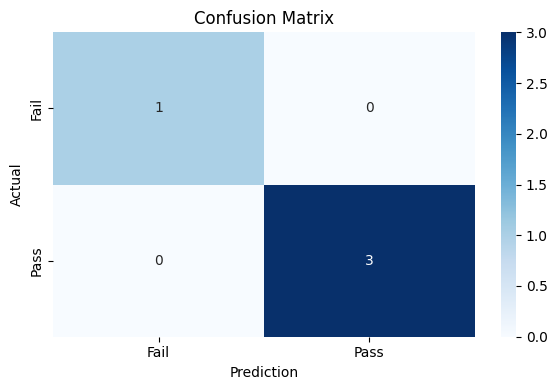

 Predict your Results

Prediction based on input: Pass


C:\Users\Harshu\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\ML_Scikit\Unsupervised_learning\student_performance017 - Sheet1.csv')

le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed']  = le.fit_transform(df['Passed'])

features = ['StudyHours','Attendence','PastScore','Sleephours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features]
y = df_scaled['Passed']

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

model = LogisticRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

print('Classification Report')
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot= True, fmt= "d", cmap = "Blues", xticklabels = ["Fail",'Pass'], yticklabels = ['Fail','Pass'])

plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

print(" Predict your Results")

try:
    study_hours = float(input("Enter your study hours: "))
    attendance = float(input("Enter your attendance (%): "))
    past_score = float(input("Enter your past score: "))
    sleep_hours = float(input("Enter your sleep hours: "))

    # ✅ Column names must exactly match those used in training
    user_input_df = pd.DataFrame([{
        'StudyHours': study_hours,
        'Attendence': attendance,
        'PastScore': past_score,
        'Sleephours': sleep_hours
    }])

    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)[0]
    result = "Pass" if prediction == 1 else "Fail"
    print(f"\nPrediction based on input: {result}")

except Exception as e:
    print("An error occurred:", e)




